In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
# Importing the datset
df_train = pd.read_csv(r'C:\Users\cd\Desktop\Machine Learning\Project\train.csv')
df_test = pd.read_csv(r'C:\Users\cd\Desktop\Machine Learning\Project\test.csv')

In [3]:
# Exploring the dataset
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
# Checking the Survival rate based on:
# i.) Passenger's ticket class (1 = First Class, 2 = Second Class, 3 = Third Class)

df_train.groupby('Pclass', as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
# ii.) Passenger's Gender
df_train.groupby('Sex', as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
# iii.) Passenger's Siblings/Spouse
df_train.groupby('SibSp', as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
# iv.) Passenger's Parent/Children
df_train.groupby('Parch', as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [11]:
# Adding a new column in dataset to get a complete overview of the Family Size of the passenger

df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1

In [12]:
df_train.groupby('Family_Size', as_index = False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
# Mapping data to view it as categorize form
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 
              6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}

df_train['Family_Size_Grouped'] = df_train['Family_Size'].map(family_map)
df_test['Family_Size_Grouped'] = df_test['Family_Size'].map(family_map)

In [14]:
df_train.groupby('Family_Size_Grouped', as_index = False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [15]:
df_train.groupby('Embarked', as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


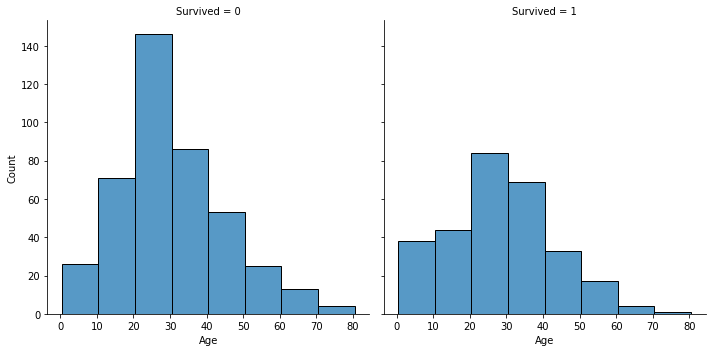

In [16]:
# Viewing the age factor involved in the survival of passengers
sns.displot(df_train, x = 'Age', col = 'Survived', binwidth = 10, height = 5)
plt.show()

In [17]:
# Creating age group
df_train['Age_Cut'] = pd.qcut(df_train['Age'], 8)
df_test['Age_Cut'] = pd.qcut(df_test['Age'], 8)

In [18]:
df_train.groupby('Age_Cut', as_index = False)['Survived'].mean()

,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [19]:
# Categorizing the Age Cut

df_train.loc[df_train['Age'] <= 16, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 20.125), 'Age'] = 1
df_train.loc[(df_train['Age'] > 20.125) & (df_train['Age'] <= 24), 'Age'] = 2
df_train.loc[(df_train['Age'] > 24) & (df_train['Age'] <= 28), 'Age'] = 3
df_train.loc[(df_train['Age'] > 28) & (df_train['Age'] <= 32.312), 'Age'] = 4
df_train.loc[(df_train['Age'] > 32.312) & (df_train['Age'] <= 38), 'Age'] = 5
df_train.loc[(df_train['Age'] > 38) & (df_train['Age'] <= 47), 'Age'] = 6
df_train.loc[(df_train['Age'] > 47) & (df_train['Age'] <= 80), 'Age'] = 7
df_train.loc[df_train['Age'] > 80, 'Age']

df_test.loc[df_test['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 20.125), 'Age'] = 1
df_test.loc[(df_test['Age'] > 20.125) & (df_test['Age'] <= 24), 'Age'] = 2
df_test.loc[(df_test['Age'] > 24) & (df_test['Age'] <= 28), 'Age'] = 3
df_test.loc[(df_test['Age'] > 28) & (df_test['Age'] <= 32.312), 'Age'] = 4
df_test.loc[(df_test['Age'] > 32.312) & (df_test['Age'] <= 38), 'Age'] = 5
df_test.loc[(df_test['Age'] > 38) & (df_test['Age'] <= 47), 'Age'] = 6
df_test.loc[(df_test['Age'] > 47) & (df_test['Age'] <= 80), 'Age'] = 7
df_test.loc[df_test['Age'] > 80, 'Age']

Series([], Name: Age, dtype: float64)

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


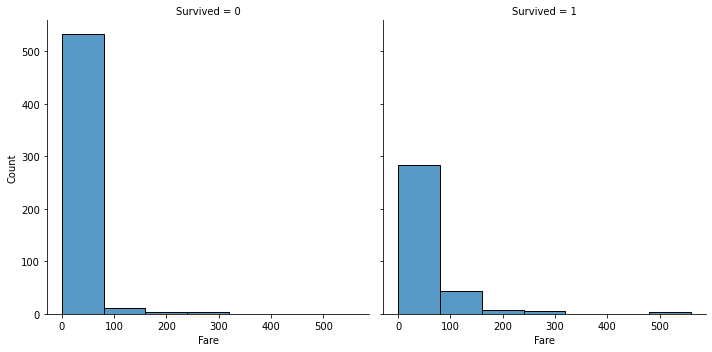

In [21]:
# Analyzing that did the fare of the ticket played any role in the survival of the passenger
sns.displot(df_train, x = 'Fare', col = 'Survived', binwidth = 80, height = 5)
plt.show()

In [22]:
# Grouping the Fare into ranged group
df_train['Fare_Cut'] = pd.qcut(df_train['Fare'], 6)
df_test['Fare_Cut'] = pd.qcut(df_test['Fare'], 6)

In [23]:
df_train.groupby('Fare_Cut', as_index = False)['Survived'].mean()

,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [24]:
# Categorzing Fare

df_train.loc[df_train['Fare'] <= 7.775, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.775) & (df_train['Fare'] <= 8.662), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 8.662) & (df_train['Fare'] <= 14.454), 'Fare'] = 2
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 26), 'Fare'] = 3
df_train.loc[(df_train['Fare'] > 26) & (df_train['Fare'] <= 52.369), 'Fare'] = 4
df_train.loc[(df_train['Fare'] > 52.369) & (df_train['Fare'] <= 512.329), 'Fare'] = 5
df_train.loc[df_train['Fare'] > 512.329, 'Fare']

df_test.loc[df_test['Fare'] <= 7.775, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.775) & (df_test['Fare'] <= 8.662), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 8.662) & (df_test['Fare'] <= 14.454), 'Fare'] = 2
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 26), 'Fare'] = 3
df_test.loc[(df_test['Fare'] > 26) & (df_test['Fare'] <= 52.369), 'Fare'] = 4
df_test.loc[(df_test['Fare'] > 52.369) & (df_test['Fare'] <= 512.329), 'Fare'] = 5
df_test.loc[df_test['Fare'] > 512.329, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [25]:
# Analyzing that did the title of passengers played a role in the survival

df_train['Title'] = df_train['Name'].str.split(",", expand  = True)[1].str.split(".", expand = True)[0].apply(lambda x: x.strip())
df_test['Title'] = df_test['Name'].str.split(",", expand  = True)[1].str.split(".", expand = True)[0].apply(lambda x: x.strip())

In [26]:
df_train.groupby('Title')['Survived'].mean()

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [27]:
# Military: Capt, Col, Major
# Noble: Jonkheer, Don, the Countess, Lady, Sir
# Unmarried Female: Mlle, Ms, Mme
# Categorzing the Title

df_train['Title'] = df_train['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Mme': 'Noble',
    'Ms': 'Noble'
})

df_test['Title'] = df_test['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Mme': 'Noble',
    'Ms': 'Noble'
})

In [28]:
df_train.groupby('Title', as_index = False)['Survived'].agg(['count', 'mean'])

,count,mean
Title,,
Dr,7,0.428571
Master,40,0.575000
Military,5,0.400000
Miss,182,0.697802
Mr,517,0.156673
Mrs,125,0.792000
Noble,9,0.777778
Rev,6,0.000000


In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr


In [30]:
# Using Name length to check some famous family's Survival Rate

df_train['Name_Length'] = df_train['Name'].apply(lambda x: len(x))
df_test['Name_Length'] = df_test['Name'].apply(lambda x: len(x))

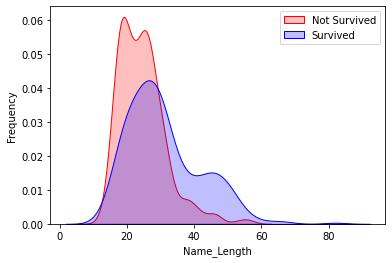

In [31]:
# Plotting the graph

g = sns.kdeplot(df_train['Name_Length'][(df_train['Survived'] == 0) & (df_train['Name_Length'].notnull())], color = 'Red', fill = True)
g = sns.kdeplot(df_train['Name_Length'][(df_train['Survived'] == 1) & (df_train['Name_Length'].notnull())], ax = g, color = 'Blue', fill = True)

g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [32]:
df_train['Name_LengthGB'] = pd.qcut(df_train['Name_Length'], 8)
df_test['Name_LengthGB'] = pd.qcut(df_test['Name_Length'], 8)

In [33]:
df_train.groupby(['Name_LengthGB'], as_index = False)['Survived'].mean()

,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [34]:
# Categorizing Name Length

df_train.loc[df_train['Name_Length'] <= 18, 'Name_Size'] = 0
df_train.loc[(df_train['Name_Length'] > 18) & (df_train['Name_Length'] <= 20), 'Name_Size'] = 1
df_train.loc[(df_train['Name_Length'] > 20) & (df_train['Name_Length'] <= 23), 'Name_Size'] = 2
df_train.loc[(df_train['Name_Length'] > 23) & (df_train['Name_Length'] <= 25), 'Name_Size'] = 3
df_train.loc[(df_train['Name_Length'] > 25) & (df_train['Name_Length'] <= 27.25), 'Name_Size'] = 4
df_train.loc[(df_train['Name_Length'] > 27.25) & (df_train['Name_Length'] <= 30), 'Name_Size'] = 5
df_train.loc[(df_train['Name_Length'] > 30) & (df_train['Name_Length'] <= 38), 'Name_Size'] = 6
df_train.loc[(df_train['Name_Length'] > 38) & (df_train['Name_Length'] <= 82), 'Name_Size'] = 7
df_train.loc[df_train['Name_Length'] > 82, 'Name_Size']

df_test.loc[df_test['Name_Length'] <= 18, 'Name_Size'] = 0
df_test.loc[(df_test['Name_Length'] > 18) & (df_test['Name_Length'] <= 20), 'Name_Size'] = 1
df_test.loc[(df_test['Name_Length'] > 20) & (df_test['Name_Length'] <= 23), 'Name_Size'] = 2
df_test.loc[(df_test['Name_Length'] > 23) & (df_test['Name_Length'] <= 25), 'Name_Size'] = 3
df_test.loc[(df_test['Name_Length'] > 25) & (df_test['Name_Length'] <= 27.25), 'Name_Size'] = 4
df_test.loc[(df_test['Name_Length'] > 27.25) & (df_test['Name_Length'] <= 30), 'Name_Size'] = 5
df_test.loc[(df_test['Name_Length'] > 30) & (df_test['Name_Length'] <= 38), 'Name_Size'] = 6
df_test.loc[(df_test['Name_Length'] > 38) & (df_test['Name_Length'] <= 82), 'Name_Size'] = 7
df_test.loc[df_test['Name_Length'] > 82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [36]:
# Fetching the ticket number

df_train['Ticket_Number'] = df_train['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
df_test['Ticket_Number'] = df_test['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [37]:
df_train.groupby(['Ticket_Number'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,count,mean
Ticket_Number,,
347082,7,0.000000
2343,7,0.000000
1601,7,0.714286
2144,6,0.000000
347088,6,0.000000
...,...,...
2662,1,0.000000
2663,1,1.000000
2664,1,0.000000


In [38]:
# Fetching the number of tickets per ticket number
df_train.groupby('Ticket_Number')['Ticket_Number'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: Ticket_Number, Length: 891, dtype: int64

In [39]:
df_train['Ticket_Number_Count'] = df_train.groupby('Ticket_Number')['Ticket_Number'].transform('count')
df_test['Ticket_Number_Count'] = df_test.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [40]:
df_train.groupby(['Ticket_Number_Count'], as_index = False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,count,mean
Ticket_Number_Count,,
1,544,0.295956
2,188,0.569149
3,66,0.712121
4,44,0.500000
7,21,0.238095
6,18,0.000000
5,10,0.000000


In [41]:
# Looking at the ticket section
df_train['Ticket'].str.split(" ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [42]:
df_train['Ticket_Location'] = np.where(df_train['Ticket'].str.split(" ", expand = True)[1].notna(), df_train['Ticket'].str.split(" ", expand = True)[0].apply(lambda x: x.strip()), 'Blank')
df_test['Ticket_Location'] = np.where(df_test['Ticket'].str.split(" ", expand = True)[1].notna(), df_test['Ticket'].str.split(" ", expand = True)[0].apply(lambda x: x.strip()), 'Blank')

In [43]:
df_train['Ticket_Location'].value_counts()

Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: Ticket_Location, dtype: int64

In [44]:
# Cleaning up the Ticket Loction

df_train['Ticket_Location'] = df_train['Ticket_Location'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A./5.': 'A/5',
    'A.5.': 'A/5',
    'W./C.': 'W/C'
})

df_test['Ticket_Location'] = df_test['Ticket_Location'].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/4.': 'A/4',
    'A/5.': 'A/5',
    'A./5.': 'A/5',
    'A.5.': 'A/5',
    'W./C.': 'W/C'
})

In [45]:
df_train.groupby(['Ticket_Location'], as_index = False)['Survived'].agg(['count', 'mean'])

,count,mean
Ticket_Location,,
A/4,6,0.000000
A/5,21,0.095238
A/S,1,0.000000
A4.,1,0.000000
Blank,665,0.383459
C,5,0.400000
C.A./SOTON,1,0.000000
CA,41,0.341463
F.C.,1,0.000000


In [46]:
# Analyzing the Train Cabin information

df_train['Cabin'] = df_train['Cabin'].fillna('U')
df_train['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'x' for i in df_train['Cabin'])

df_test['Cabin'] = df_test['Cabin'].fillna('U')
df_test['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'x' for i in df_test['Cabin'])

In [47]:
df_train.groupby(['Cabin'], as_index = False)['Survived'].agg(['count', 'mean'])

,count,mean
Cabin,,
A,15,0.466667
B,47,0.744681
C,59,0.593220
D,33,0.757576
E,32,0.750000
F,13,0.615385
G,4,0.500000
T,1,0.000000
U,687,0.299854


In [48]:
df_train['Cabin_Assigned'] = df_train['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
df_test['Cabin_Assigned'] = df_test['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [49]:
df_train.groupby(['Cabin_Assigned'], as_index = False)['Survived'].agg(['count', 'mean'])

,count,mean
Cabin_Assigned,,
0,687,0.299854
1,204,0.666667


In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,Ticket_Number,Ticket_Number_Count,Ticket_Location,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,Blank,0


In [51]:
# Overviewing the data to build up the model
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_Size          418 non-null    int64   
 12  Family_Size_Grouped  418 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [53]:
# Filling up the missing values

df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())

df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [54]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder
si = SimpleImputer(strategy = 'most_frequent')

In [55]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

In [56]:
# Splitting the data into Independent Variable (X) and Dependent Variable (y)

X = df_train.drop(['Survived'], axis  = 1)
y = df_train['Survived']

X_test = df_test.drop(['Age_Cut', 'Fare_Cut'], axis = 1)

In [57]:
# Splitting the data into train and test model
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 21, test_size = 0.2, stratify = y)

In [58]:
# Building up the pipeline

ordinal_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])

In [59]:
ohe_pipeline = Pipeline(steps = [
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [60]:
 col_trans = ColumnTransformer(transformers = [
     ('impute', si, ['Age']),
     ('ordinal_pipeline', ordinal_pipeline, ode_cols),
     ('ohe_pipeline', ohe_pipeline, ohe_cols),
     ('passthrough', 'passthrough', ['Pclass', 'Ticket_Number_Count', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
    ],
    remainder = 'drop',
    n_jobs = -1
)

In [61]:
# Building up the model for testing our predictions
rfc = RandomForestClassifier()

In [62]:
# Buidling up the parameters to fit in the model
param_grid = {
    'n_estimators': [100,150, 200],
    'min_samples_split': [5, 10 , 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [63]:
# Building up the cross validation score to check the best score/accuracy of our model
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [64]:
# Making the pipeline to fit
rfc_pipefinal = make_pipeline(col_trans, CV_rfc)
rfc_pipefinal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                   'Ticket_Number_Count',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [65]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
0.8300502314586822


In [66]:
# Using the Decision Tree Model
dtc = DecisionTreeClassifier()

In [67]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [68]:
CV_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [69]:
dtc_pipefinal = make_pipeline(col_trans, CV_dtc)
dtc_pipefinal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Count',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [70]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8159854230276766


In [72]:
# Using the K-Nearest Neighbors Model
knn = KNeighborsClassifier()

In [74]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [75]:
CV_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [76]:
knn_pipefinal = make_pipeline(col_trans, CV_knn)
knn_pipefinal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Count',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [77]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8033881611346401


In [78]:
# Using the Simple Vector Machine Model
svc = SVC()

In [79]:
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [80]:
CV_svc = GridSearchCV(estimator = svc, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [81]:
svc_pipefinal = make_pipeline(col_trans, CV_svc)
svc_pipefinal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Count',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [82]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.7991529597163399


In [83]:
# Using Logistic Regression Model
lr = LogisticRegression()

In [84]:
param_grid = {
    'C': [100, 10, 1.0, 0.1, 0.01, 0.001]
}

In [85]:
CV_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [86]:
lr_pipefinal = make_pipeline(col_trans, CV_lr)
lr_pipefinal.fit(X_train, y_train)

C:\Users\cd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\cd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Count',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.01,
                                                0.001]}))])

In [87]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8048163104501134


In [88]:
# Using Naive Bayes Model
gnb = GaussianNB()

In [89]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}

In [90]:
CV_gnb = GridSearchCV(estimator = gnb, param_grid = param_grid, cv = StratifiedKFold(n_splits = 5))

In [91]:
gnb_pipefinal = make_pipeline(col_trans, CV_gnb)
gnb_pipefinal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ordinal_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'Ticket_Number_Count',
                                                   'Cabin_Assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [92]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-09}
0.7795035949965528
